# Extra: Realiza un modelo de clusterización para clientes basado en sus características de compra, incluye insights de cada cluster basados en su comportamiento (E Commerce Dataset) 

In [15]:
# Cargamos las librerías que vamos a necesitar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
import seaborn as sns

In [2]:
# Leemos los datos
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm') 

## Preparación de los datos

In [3]:
# Buscar que variables son NaN
columns_NaN,types = [],[]
for i in df.columns:
    if df[i].isna().any():
        columns_NaN.append(i)
        types.append(df[i].dtype)
print(columns_NaN)
print(types)

['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


In [4]:
# Quitamos la columna de customerid ya que no es relevante y no aporta nada al modelo
X = df.iloc[:,1:]

# Obtenemos la moda de los datos y lo mostramos
X_mode = X[columns_NaN].mode()
X_mode

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,1.0,9.0,3.0,14.0,1.0,2.0,3.0


In [5]:
# Imputamos los datos con la moda
for i in columns_NaN:
    X[i].fillna(X_mode[i][0], inplace=True)

In [6]:
# Checamos que columnas son string y sus índices
columns_str, idx_str = [],[]
for t,i in enumerate(X.columns):
    if X[i].dtype == 'object':
        columns_str.append(i)
        idx_str.append(t)
print(columns_str)
print(idx_str)

['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
[2, 5, 6, 9, 11]


## Quitar datos atípicos

In [50]:
# Se utilizó lo hecho en el problema 2
max_ter = 31
print(f"La variabe Tenure tenemos {sum(X['Tenure']>max_ter)} valores mayores a {max_ter} que se podrían considerar atípicos")
X_ter = X[X['Tenure']>max_ter]

max_wth = 36
print(f"La variabe WarehouseToHome tenemos {sum(X['WarehouseToHome']>max_wth)} valores mayores a {max_wth} que se podrían considerar atípicos")
X_wth = X[X['Tenure']>max_ter]

max_nof = 11
print(f"La variabe NumberOfAddress tenemos {sum(X['NumberOfAddress']>max_nof)} valores mayores a {max_nof} que se podrían considerar atípicos")
X_nof = X[X['Tenure']>max_ter]

max_ca = 110
print(f"La variabe CashbackAmount tenemos {sum(X['CashbackAmount']<max_ca)} valores menores a {max_ca} que se podrían considerar atípicos")
X_ca = X[X['Tenure']>max_ter]

La variabe Tenure tenemos 4 valores mayores a 31 que se podrían considerar atípicos
La variabe WarehouseToHome tenemos 2 valores mayores a 36 que se podrían considerar atípicos
La variabe NumberOfAddress tenemos 4 valores mayores a 11 que se podrían considerar atípicos
La variabe CashbackAmount tenemos 12 valores menores a 110 que se podrían considerar atípicos


In [51]:
# Aquí vamos a poner los ìndices de los renglones que vamos a quitar
index_rm = []
index_rm = index_rm + X_ter.index.tolist() + X_wth.index.tolist() + X_ca.index.tolist() + X_nof.index.tolist()

In [53]:
# Quitamos los datos atípicos, debido a que no son muchos
X_rm = X.drop(index_rm)

## Análisis

Hacemos un análisis basado en el Método del codo para ver cuál es el número óptimo de clusters para estos datos y utilizamos el modelo de K-Prototypes que sirve para datos categóricos y numéricos.

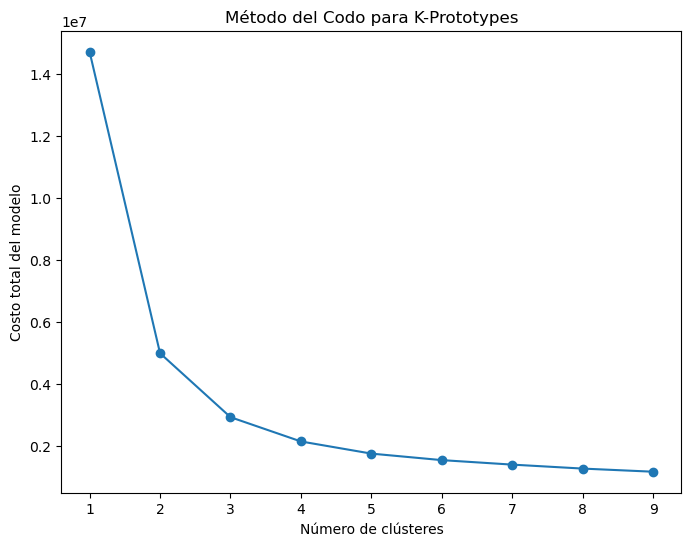

In [54]:
costos = []

for k in range(1, 10):
    kproto = KPrototypes(n_clusters=k)
    kproto.fit_predict(X_rm,  categorical=idx_str)  
    costos.append(kproto.cost_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), costos, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Costo total del modelo')
plt.title('Método del Codo para K-Prototypes')
plt.show()

Tomando el método del codo, podemos observar que aparte de 3 o 4 clusters ya no baja mucho el costo del modelo. Por lo cual se van a analizar para estos números.

## 3 Clusters

In [69]:
kproto = KPrototypes(n_clusters=3)
clusters = kproto.fit_predict(X_rm.values, categorical=idx_str)

# Asignar los clusters de vuelta al DataFrame original para mayor claridad
X_rm['Cluster'] = clusters

In [56]:
X_rm[X_rm['Cluster']==0].mode()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,0.0,23.0,Mobile Phone,1.0,9.0,Debit Card,Male,3.0,4.0,Grocery,3.0,Married,3.0,0.0,14.0,1.0,2.0,9.0,243.36,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.61,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299.26,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.61,NaN


In [57]:
X_rm[X_rm['Cluster']==1].mode()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,0.0,1.0,Phone,1.0,9.0,Debit Card,Male,3.0,4.0,Mobile Phone,3.0,Married,2.0,0.0,13.0,1.0,1.0,2.0,123.42,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,148.42,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.36,NaN


In [58]:
X_rm[X_rm['Cluster']==2].mode()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,0,1.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Married,3,0,12.0,1.0,2.0,3.0,188.47,2


In [59]:
# Estadísticas descriptivas por clúster
for c in X_rm['Cluster'].unique():
    print(f"Estadísticas del Clúster {c}:")
    display(X_rm[X_rm['Cluster'] == c].describe())

Estadísticas del Clúster 1:


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
count,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.0
mean,0.208511,6.901824,1.544681,15.037690,2.851976,3.571125,3.074772,3.834954,0.282371,15.623100,1.377204,2.303343,3.629787,145.246945,1.0
std,0.406305,7.287379,0.863068,8.480036,0.680911,1.022676,1.369388,2.490321,0.450221,3.653453,1.477807,2.039386,3.086130,16.764331,0.0
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,132.102500,1.0
50%,0.000000,5.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,14.000000,1.000000,2.000000,3.000000,147.995000,1.0
75%,0.000000,11.000000,2.000000,19.000000,3.000000,4.000000,4.000000,5.000000,1.000000,18.000000,2.000000,2.000000,5.000000,156.650000,1.0
max,1.000000,31.000000,3.000000,127.000000,5.000000,6.000000,5.000000,21.000000,1.000000,26.000000,16.000000,16.000000,31.000000,171.840000,1.0


Estadísticas del Clúster 0:


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.0
mean,0.051205,19.596386,1.530120,14.914157,2.932229,3.746988,3.106928,4.935241,0.274096,14.968373,2.198795,4.784639,6.837349,284.431099,0.0
std,0.220581,6.958813,0.848562,8.548514,0.720263,0.985180,1.352841,2.537863,0.446394,3.072855,2.483660,4.423338,4.435636,22.821949,0.0
min,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,240.260000,0.0
25%,0.000000,15.000000,1.000000,8.000000,2.000000,3.000000,2.000000,3.000000,0.000000,14.000000,1.000000,2.000000,3.000000,264.370000,0.0
50%,0.000000,20.000000,1.000000,12.000000,3.000000,4.000000,3.000000,4.000000,0.000000,14.000000,1.000000,2.000000,7.000000,288.155000,0.0
75%,0.000000,25.000000,2.000000,18.250000,3.000000,4.000000,4.000000,7.000000,1.000000,15.000000,2.000000,7.000000,10.000000,299.260000,0.0
max,1.000000,31.000000,3.000000,36.000000,4.000000,6.000000,5.000000,11.000000,1.000000,26.000000,16.000000,16.000000,18.000000,324.990000,0.0


Estadísticas del Clúster 2:


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
count,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.0
mean,0.136364,11.364833,1.919856,16.113038,3.096890,3.900718,3.037679,4.675239,0.293660,15.889952,2.194976,3.535885,5.147129,197.449438,2.0
std,0.343277,7.867904,0.983789,8.302251,0.719192,1.004335,1.411805,2.647521,0.455574,3.666837,2.080723,3.077286,3.504448,19.771345,0.0
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,170.050000,2.0
25%,0.000000,5.000000,1.000000,9.000000,3.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,3.000000,179.847500,2.0
50%,0.000000,10.000000,1.000000,14.000000,3.000000,4.000000,3.000000,4.000000,0.000000,15.000000,2.000000,2.000000,4.000000,192.795000,2.0
75%,0.000000,16.000000,3.000000,22.000000,4.000000,4.000000,4.000000,6.000000,1.000000,18.000000,3.000000,4.000000,8.000000,211.200000,2.0
max,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,14.000000,16.000000,46.000000,241.310000,2.0


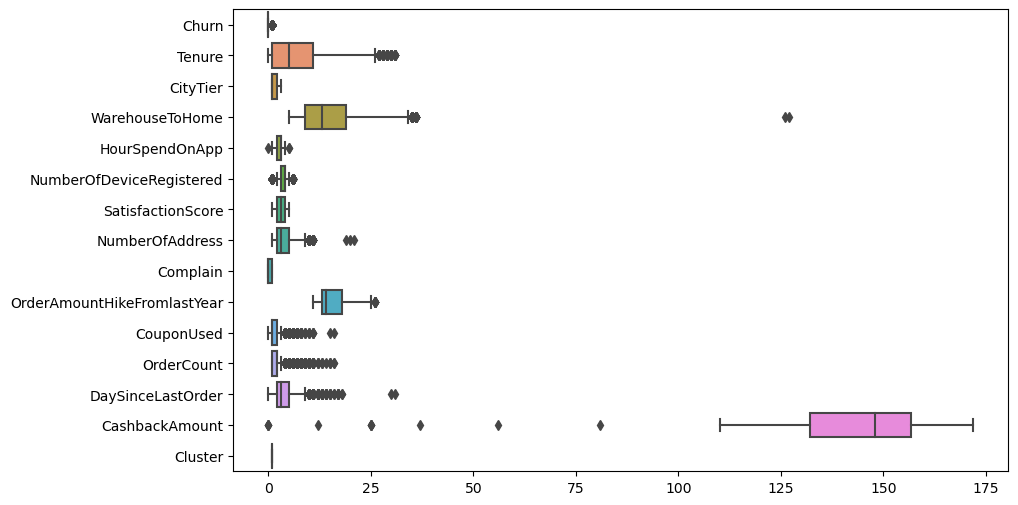

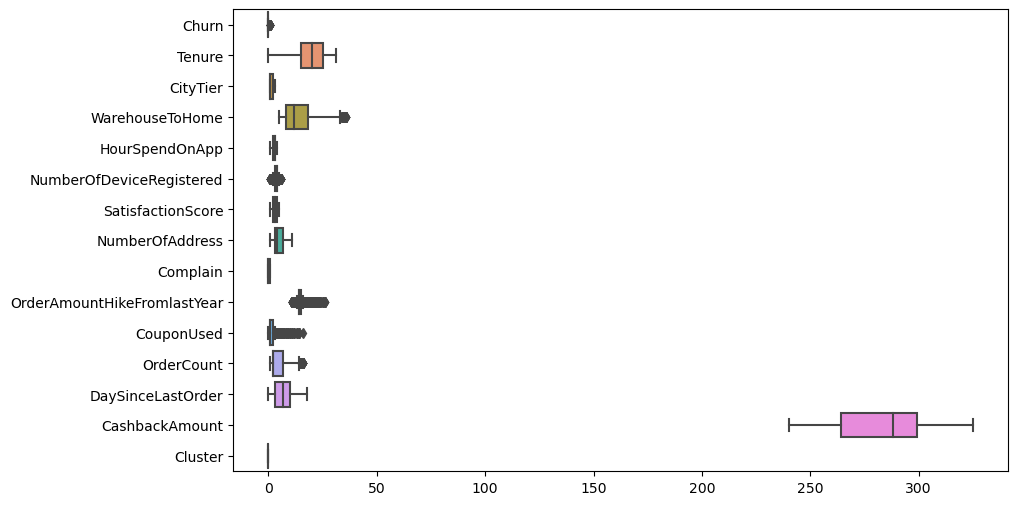

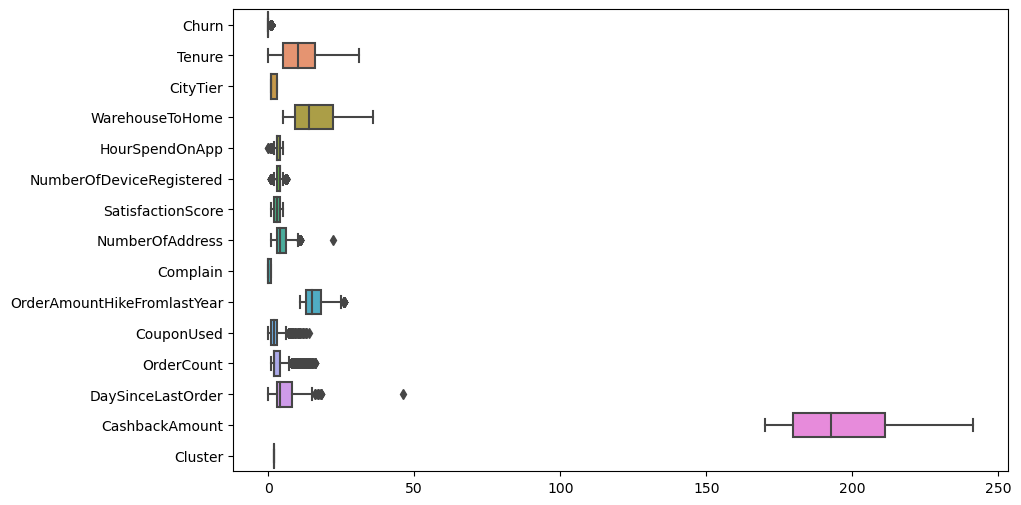

In [60]:
# Visualización de distribuciones
for c in X_rm['Cluster'].unique():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=X_rm[X_rm['Cluster'] == c], orient='h')
    plt.title

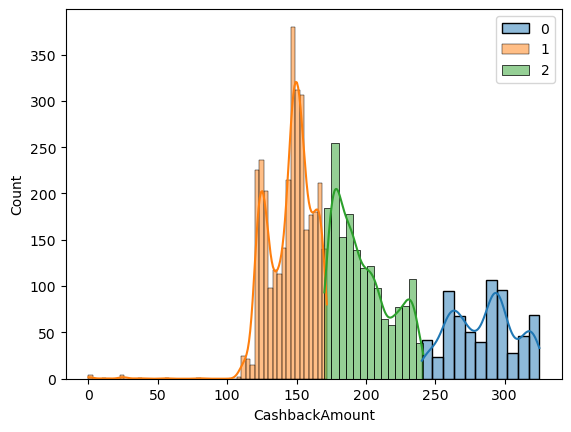

In [61]:
# Estadísticas descriptivas por clúster
grouped = X_rm.groupby('Cluster')
summary_stats = grouped.describe()

# Visualización de la distribución de una variable
for k in grouped.groups.keys():
    sns.histplot(grouped.get_group(k)['CashbackAmount'], kde=True, label=str(k))
plt.legend()
plt.show()

In [71]:
print(kproto.cluster_centroids_)

[['0.2082574377656345' '6.9159077109896785' '1.546448087431694'
  '15.04796599878567' '2.852762598664238' '3.57103825136612'
  '3.0734669095324834' '3.8357619914996963' '0.28263509411050397'
  '15.62173649058895' '1.3761384335154827' '2.302367941712204'
  '3.6296296296296298' '145.2775440194291' '0.7261687917425622' 'Phone'
  'Debit Card' 'Male' 'Mobile Phone' 'Married']
 ['0.05120481927710843' '19.596385542168676' '1.5301204819277108'
  '14.914156626506024' '2.9322289156626504' '3.746987951807229'
  '3.1069277108433737' '4.9352409638554215' '0.2740963855421687'
  '14.968373493975903' '2.1987951807228914' '4.784638554216867'
  '6.837349397590361' '284.43109939758995' '2.9156626506024095'
  'Mobile Phone' 'Debit Card' 'Male' 'Grocery' 'Married']
 ['0.1366906474820144' '11.347721822541967' '1.9172661870503598'
  '16.095323741007196' '3.095923261390887' '3.9016786570743407'
  '3.040167865707434' '4.675659472422062' '0.2931654676258993'
  '15.893285371702637' '2.199040767386091' '3.5407673

Cuando hay 3 categorías, los tamaños de cada cluster son muy diferentes, El 1er cluster tiene 3290, el 2do tiene 664 y el 3ro tiene 1692. Donde se puede ver la diferencia más notable es en la variable CashbackAmount, ya que los 3 clusters tiene diferente media, 145, 284 y 197 respectivamente. Podríamos separar a los usuario por cuanto cashback reciben los meses anteriores.

## 4 Clusters

In [72]:
kproto = KPrototypes(n_clusters=4)
clusters = kproto.fit_predict(X_rm.values, categorical=idx_str)

# Asignar los clusters de vuelta al DataFrame original para mayor claridad
X_rm['Cluster'] = clusters

In [63]:
X_rm[X_rm['Cluster']==0].mode()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,0,1.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Married,3,0,14.0,1.0,2.0,3.0,188.47,0


In [64]:
X_rm[X_rm['Cluster']==1].mode()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,0.0,1.0,Phone,1.0,9.0,Debit Card,Male,3.0,3.0,Mobile Phone,3.0,Married,2.0,0.0,14.0,1.0,1.0,2.0,123.42,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.42,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.36,NaN


In [65]:
X_rm[X_rm['Cluster']==2].mode()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,0,10.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4,Fashion,3,Married,3,0,12.0,1.0,2.0,3.0,200.96,2


In [66]:
X_rm[X_rm['Cluster']==3].mode()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,0.0,23.0,Mobile Phone,1.0,9.0,Debit Card,Male,3.0,4.0,Grocery,3.0,Married,5.0,0.0,14.0,1.0,2.0,1.0,278.61,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299.26,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.61,NaN


In [67]:
# Estadísticas descriptivas por clúster
for c in X_rm['Cluster'].unique():
    print(f"Estadísticas del Clúster {c}:")
    display(X_rm[X_rm['Cluster'] == c].describe())

Estadísticas del Clúster 0:


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.0
mean,0.120910,9.642818,1.804770,16.120355,3.094842,3.861342,3.039933,4.530227,0.286190,15.771492,1.845813,2.960621,5.041043,172.707438,0.0
std,0.326113,7.514026,0.964773,8.768982,0.701505,1.019057,1.389896,2.667591,0.452105,3.534502,1.677549,2.385701,3.274779,10.969852,0.0
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,153.800000,0.0
25%,0.000000,3.000000,1.000000,9.000000,3.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,3.000000,163.885000,0.0
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,4.000000,0.000000,15.000000,1.000000,2.000000,4.000000,171.270000,0.0
75%,0.000000,14.000000,3.000000,21.000000,4.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,8.000000,180.930000,0.0
max,1.000000,31.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,12.000000,14.000000,31.000000,195.820000,0.0


Estadísticas del Clúster 1:


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.0
mean,0.239967,6.115803,1.502090,14.587793,2.796405,3.486204,3.074415,3.639632,0.281355,15.636288,1.270067,2.160117,3.238712,138.433031,1.0
std,0.427152,6.979534,0.836732,8.115374,0.670165,1.017937,1.370166,2.427826,0.449754,3.706594,1.424752,1.954060,2.943117,14.430152,0.0
min,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,0.000000,1.000000,1.000000,127.230000,1.0
50%,0.000000,3.000000,1.000000,12.000000,3.000000,3.000000,3.000000,3.000000,0.000000,14.000000,1.000000,2.000000,2.000000,142.465000,1.0
75%,0.000000,10.000000,2.000000,18.000000,3.000000,4.000000,4.000000,5.000000,1.000000,18.000000,2.000000,2.000000,4.000000,149.070000,1.0
max,1.000000,31.000000,3.000000,126.000000,5.000000,6.000000,5.000000,20.000000,1.000000,26.000000,16.000000,16.000000,30.000000,156.170000,1.0


Estadísticas del Clúster 3:


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.0
mean,0.049342,19.871711,1.536184,14.636513,2.921053,3.740132,3.139803,4.973684,0.274671,14.896382,2.157895,5.041118,6.894737,287.995280,3.0
std,0.216760,6.625296,0.850626,8.371194,0.710257,0.979981,1.350524,2.533980,0.446716,2.985542,2.424084,4.537592,4.503936,20.420214,0.0
min,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,253.790000,3.0
25%,0.000000,15.000000,1.000000,8.000000,2.000000,3.000000,2.000000,3.000000,0.000000,14.000000,1.000000,2.000000,3.000000,268.560000,3.0
50%,0.000000,20.000000,1.000000,11.000000,3.000000,4.000000,3.000000,5.000000,0.000000,14.000000,1.000000,2.000000,7.000000,290.875000,3.0
75%,0.000000,25.000000,2.000000,18.000000,3.000000,4.000000,4.000000,6.000000,1.000000,15.000000,2.000000,7.000000,10.000000,300.840000,3.0
max,1.000000,31.000000,3.000000,36.000000,4.000000,6.000000,5.000000,11.000000,1.000000,26.000000,16.000000,16.000000,18.000000,324.990000,3.0


Estadísticas del Clúster 2:


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.00000,823.000000,823.000000,823.000000,823.000000,823.0
mean,0.153098,12.908870,1.855407,16.354800,2.992710,3.868773,3.054678,4.633050,0.298906,15.81045,2.409478,3.763062,4.933171,217.783366,2.0
std,0.360301,8.447791,0.976483,8.500207,0.729927,0.974010,1.409276,2.533278,0.458057,3.80012,2.444271,3.501963,3.721988,14.977338,0.0
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,194.390000,2.0
25%,0.000000,6.000000,1.000000,9.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.00000,1.000000,2.000000,3.000000,204.400000,2.0
50%,0.000000,12.000000,1.000000,14.000000,3.000000,4.000000,3.000000,4.000000,0.000000,15.00000,2.000000,2.000000,3.000000,216.910000,2.0
75%,0.000000,19.000000,3.000000,23.000000,3.500000,4.000000,4.000000,6.000000,1.000000,18.00000,3.000000,5.000000,8.000000,231.090000,2.0
max,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,26.00000,14.000000,16.000000,46.000000,253.080000,2.0


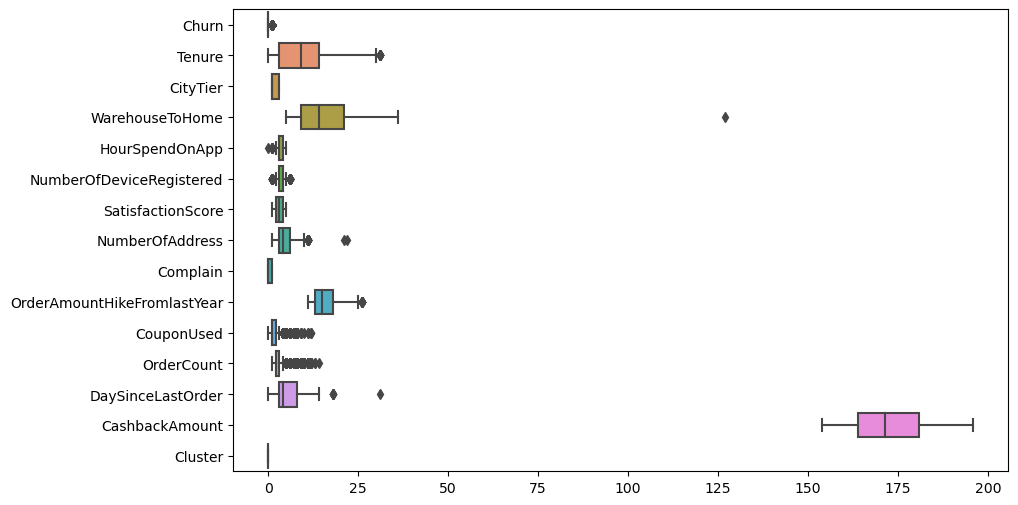

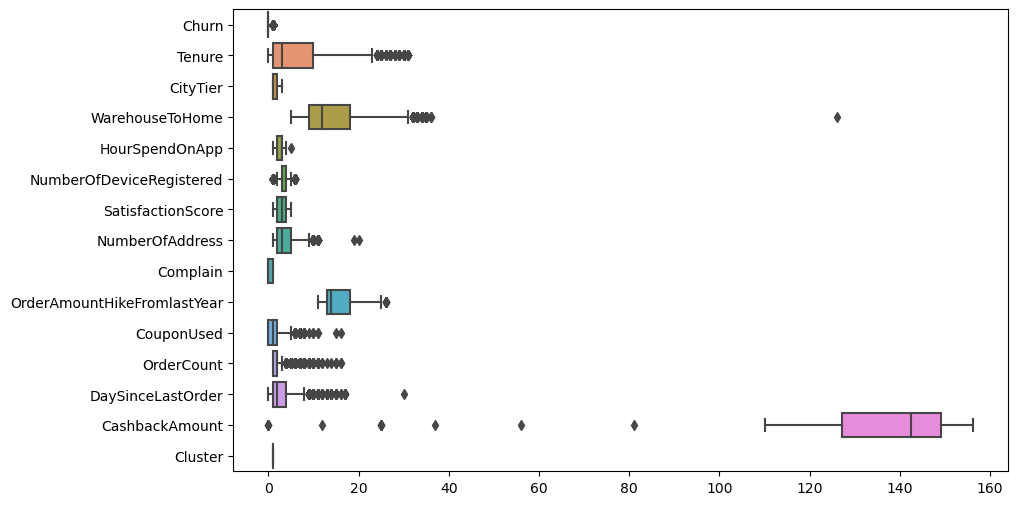

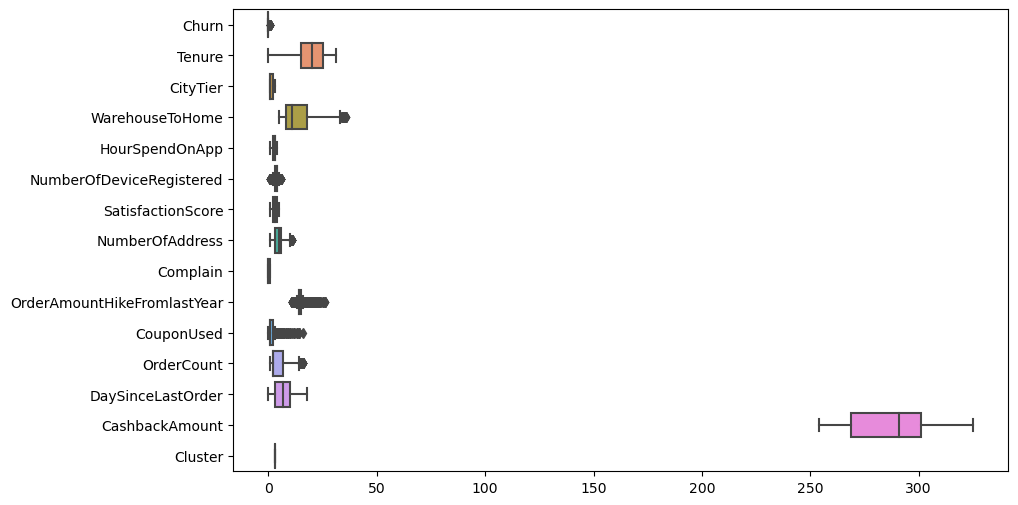

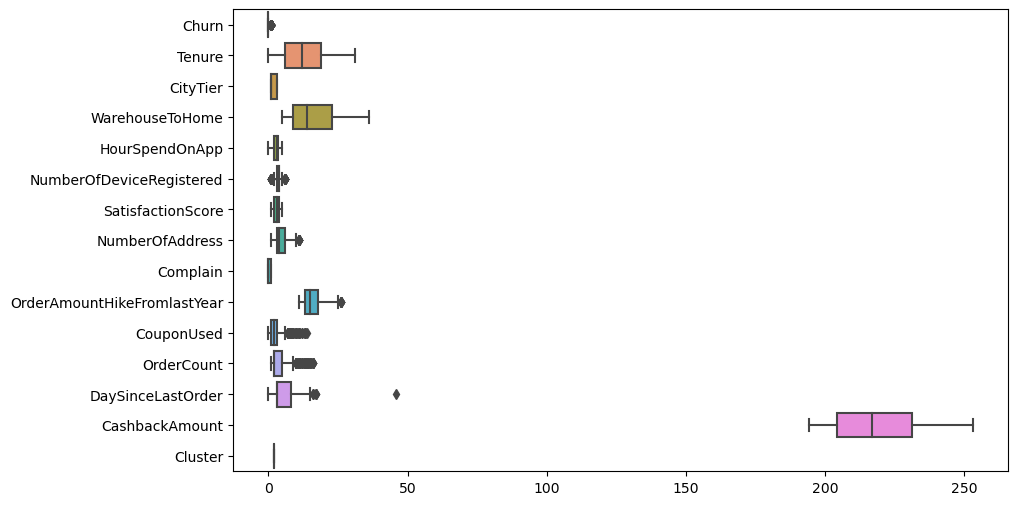

In [68]:
# Visualización de distribuciones
for c in X_rm['Cluster'].unique():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=X_rm[X_rm['Cluster'] == c], orient='h')
    plt.title

In [73]:
print(kproto.cluster_centroids_)

[['0.1209095951192457' '9.642817526344981' '1.8047698280643372'
  '16.120354963948973' '3.0948419301164725' '3.861342207432058'
  '3.0399334442595674' '4.530227398779812' '0.28618968386023297'
  '15.771491957848031' '1.845812534664448' '2.9606211869107044'
  '5.041042706600111' '172.70743760399253' '0.9994453688297282'
  'Mobile Phone' 'Debit Card' 'Male' 'Laptop & Accessory' 'Married']
 ['0.15309842041312272' '12.908869987849332' '1.8554070473876063'
  '16.35479951397327' '2.9927095990279464' '3.868772782503038'
  '3.054678007290401' '4.633049817739976' '0.29890643985419196'
  '15.81044957472661' '2.4094775212636694' '3.7630619684082625'
  '4.933171324422843' '217.7833657351156' '1.9319562575941678'
  'Mobile Phone' 'Debit Card' 'Male' 'Fashion' 'Married']
 ['0.049342105263157895' '19.87171052631579' '1.5361842105263157'
  '14.636513157894736' '2.9210526315789473' '3.7401315789473686'
  '3.1398026315789473' '4.973684210526316' '0.2746710526315789'
  '14.896381578947368' '2.15789473684

El 1er cluster tiene 1803, el 2do tiene 2392, el 3ro tiene 608 y el 4to tiene 823. Donde se puede ver la diferencia más notable es en la variable CashbackAmount, un poquito más cerrada que con 3 clusters, ya que los 4 clusters tiene diferente media 172, 138, 287 y 271 respectivamente. Otra cosa relevantes es en la variable PerfereedOrderCat donde cada uno de los 4 cluster tiene diferente valor, Laptop & Accesory, Mobile Phone, Fashion y Grocery para la parte de la moda. En todas el uso de DebitCard fue la que más se usó en los clusters.